# **7. Thresholding**

In [1]:
from IPython.display import display, clear_output
from configs.config import BASE_PATH
from matplotlib import pyplot as plt
import imageio
import numpy as np
import cv2
import os

path = os.path.join(BASE_PATH,"data","image",'opencv_image5.jpg')
img = cv2.imread(path,cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img_ycrcb = cv2.cvtColor(img,cv2.COLOR_RGB2YCrCb)

## **1.Binary Thresholding**
* 단순히 픽셀의 밝기를 이용해서 임계값보다 크면 0, 아니면 1(최대)로 설정해주는 메서드이다.

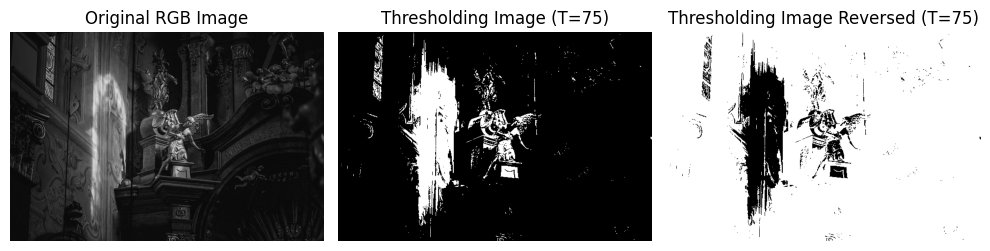

In [2]:
for cutoff in range(0,80,5):
    ret, img_thresh = cv2.threshold(img_gray, cutoff, 255, cv2.THRESH_BINARY)
    ret, img_thresh_rev = cv2.threshold(img_gray, cutoff, 255, cv2.THRESH_BINARY_INV)
    
    clear_output(wait=True)
    
    plt.figure(figsize=(10,5))

    plt.subplot(1,3,1)
    plt.imshow(img_gray, cmap='gray')
    plt.title('Original RGB Image')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(img_thresh, cmap='gray')
    plt.title(f'Thresholding Image (T={cutoff})')
    plt.axis('off')

    plt.subplot(1,3,3)
    plt.imshow(img_thresh_rev, cmap='gray')
    plt.title(f'Thresholding Image Reversed (T={cutoff})')
    plt.axis('off')

    plt.tight_layout()
    plt.pause(0.005) 
    plt.close()

## **2.Otsu Thresholding**

* 히스토그램 분포를 분석하여 이미지 이진화에 최적의 임계값을 찾아내는 메서드.

* 클래스 간 분산이 최대가 되는 임계값을 찾습니다.
  * 여기서 클래스는 배경(background)과 전경(foreground)이다.

<br>

* 클래스 간 분산 : 배경과 전경 클래스 간의 평균값 차이를 측정하며, 이 분산이 최대가 되는 임계값을 선택한다.
  
* 클래스의 픽셀 비율 : 클래스 간 분산을 계산할 때, 각 클래스의 픽셀 비율(각 클래스의 전체 픽셀 수)도 고려한다.

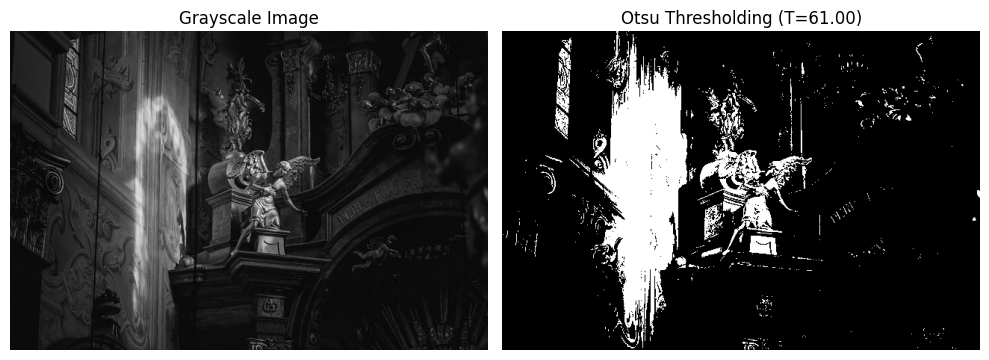

In [3]:
ret, img_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

plt.figure(figsize=(10,5))

images = [img_gray, img_thresh]
titles = ['Grayscale Image', f'Otsu Thresholding (T={ret:.2f})']
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

    plt.tight_layout()
plt.show()

## **3.Truncation Thresholding**


* 이미지의 픽셀 값이 임계값보다 클 경우, 픽셀 값을 임계값으로 제한한다.

* 임계값보다 큰 픽셀 값은 임계값으로 설정하고, 임계값보다 작은 픽셀 값은 원본 값을 유지.

* 이미지의 고주파 노이즈를 감소시키거나, 특정 밝기 범위 내의 픽셀 값만 유지하고자 할 때 사용한다.

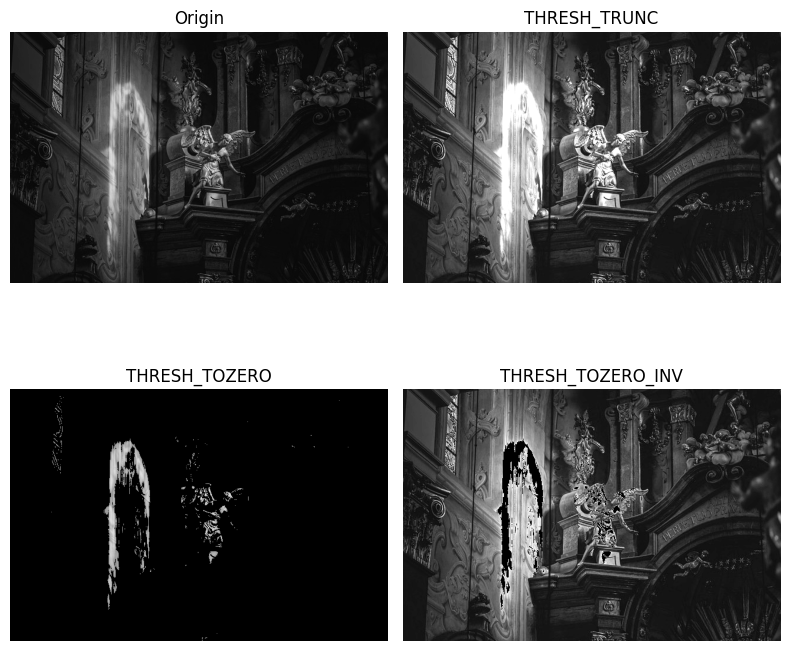

In [4]:
ret, img_thresh_trunc = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TRUNC)
ret, img_thresh_tozero = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO)
ret, img_thresh_tozero_inv = cv2.threshold(img_gray, 127, 255, cv2.THRESH_TOZERO_INV)

images = [img_gray, img_thresh_trunc, img_thresh_tozero, img_thresh_tozero_inv]
titles = ['Origin', 'THRESH_TRUNC', 'THRESH_TOZERO', 'THRESH_TOZERO_INV']

plt.figure(figsize=(8,8))

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

## **4. Adaptive Thresholding**

* 이미지의 지역적인 밝기 변화를 고려하여 적절한 임계값을 자동으로 설정.
  
* 조명이 고르지 않은 이미지에서 효과적이다.

* patch base의 메서드이다. patch size는 항상 홀수이다.

* 픽셀의 임계값은 patch 내 값 중 mean, gaussian 평균을 사용

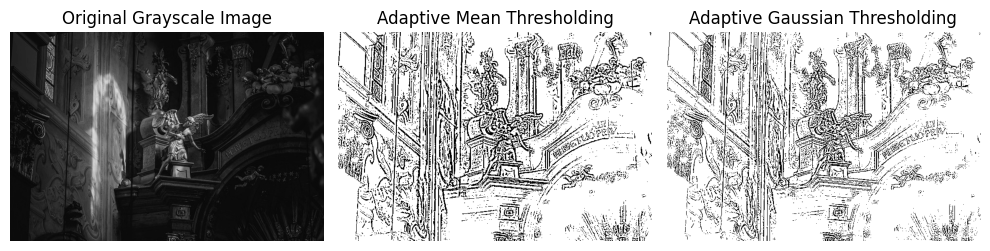

In [5]:
img_adaptive_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 7, 5) # 블록사이즈, 임계값
img_adaptive_gaussian = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 7, 5)

images = [img_gray, img_adaptive_mean, img_adaptive_gaussian]
titles = ['Original Grayscale Image', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

plt.figure(figsize=(10,10))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()